# Oath Dice Roll and Campain Analysis
## Background
Oath is a strategy board game for one to six players involving economy, board control, and battle components. This analysis focuses on the battle aspect, specifically the campaign action. 

The campaign action pits two players against one another in direct combat. The initiator is known as the attacker, and the target of the campaign is the defender. Each player rolls a set of six-sided dice and then applies modifiers to their roll. These modifiers and the number of dice rolled by each player are based on other aspects of the game state. The higher result wins.

What makes these rolls interesting and worthy of analysis is the unique dice associated with each roll. The attacker rolls attacker dice with these faces:
- 3 half sword faces
- 2 full sword faces
- 1 two sword and skull face

The total attacker result is determined by adding up the sum of swords rolled (rounded down). The skull face indicates the attacker must also sacrifice one of their warbands, however this is not impactful to the result of the roll. The attacker may also choose to sacrifice any number of warbands they control after the result of the roll to increase their result by one for each sacrificed in this manner. This will come into effect later on in the analysis.

The defender rolls dice with a set of different faces:
- 2 blank faces
- 2 one shield faces
- 1 two shield face
- 1 two times multiplier face

The total defender result is determined by adding up the sum of shields rolled and then multiplying this result by $2^n$ where $n$ is the number of two times multipliers rolled. The unique multiplier face makes defender rolls far more interesting in their distribution and less intuitive to players' expectations warranting this analysis.

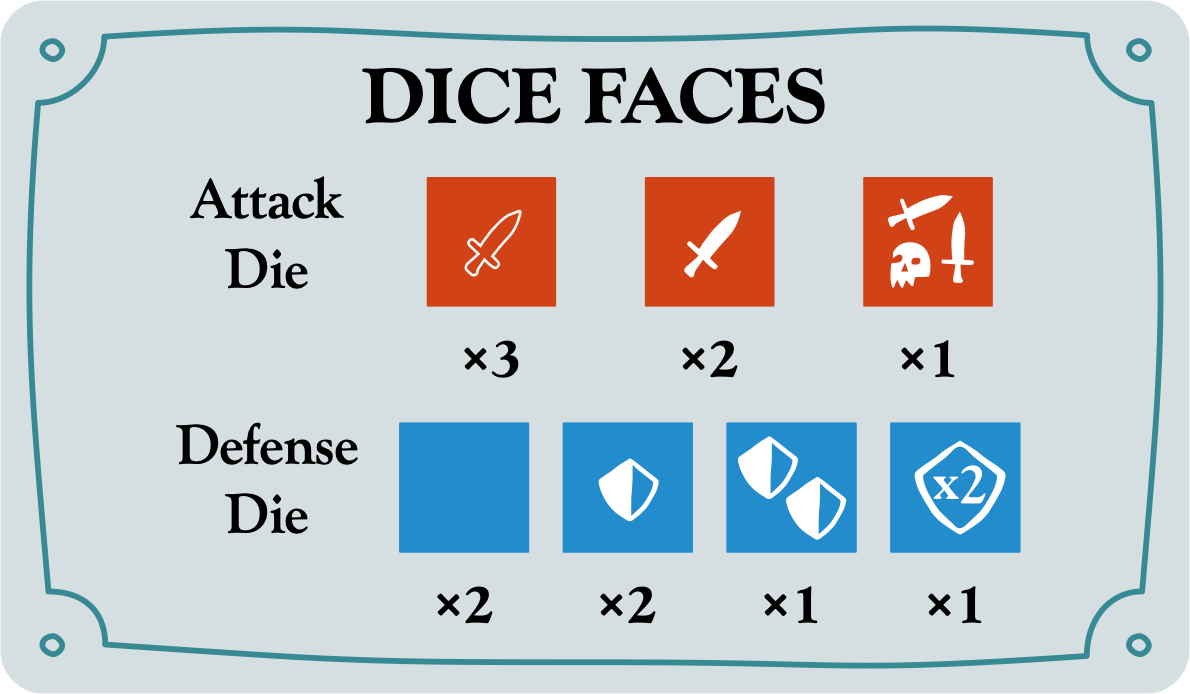

## Setup and Functions

In [1]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd

### Dice Rolling and Distribution Functions

In [10]:
def defender_roll(n_dice, result, sum = 0, mult = 1, n = 1):
    '''Recursively finds all results of rolling n defender dice.
    
    result should be a 1D array with 2^n + 1 rows initialized to all zeros. After calling defender_roll,
    the array will have entries result[i] where the value of the entry indicates the relative frequency of a
    defender roll with result i.'''
    
    assert len(result) >= 2 ** n_dice + 1
    if n_dice == 0:
        result[sum * mult] += n
    else:
        defender_roll(n_dice - 1, result, sum, mult, n * 2)
        defender_roll(n_dice - 1, result, sum + 1, mult, n * 2)
        defender_roll(n_dice - 1, result, sum + 2, mult, n)
        defender_roll(n_dice - 1, result, sum, mult * 2, n)
        
def attacker_roll(n_dice, result, sum = 0, deaths = 0, n = 1):
    '''Recursively finds all results of rolling n attacker dice.
    
    result should a 2D array with 2n + 1 rows and n + 1 columns initialized to all zeros. After calling attacker_roll,
    the array will have entries result[i, j] where the value of the entry indicates the relative frequency of an
    attacker roll with a result i and forced warband sacrifices j.'''
    
    assert (len(result) >= 2 * n_dice + 1) & (len(result[0]) >= n_dice + 1)
    if n_dice == 0:
        result[np.floor(sum)][deaths] += n
    else:
        attacker_roll(n_dice - 1, result, sum + 0.5, deaths, n * 3)
        attacker_roll(n_dice - 1, result, sum + 1, deaths, n * 2)
        attacker_roll(n_dice - 1, result, sum + 2, deaths + 1, n)
        
def defender_dist(n_dice, cumulative = False):
    '''Returns the distribution of rolling n defender dice.
    
    Creates and returns an appropriately sized array containing the proportional frequencies of results for rolling
    n defender dice. If cumulative == True, the frequencies will be cumulative such that result[i] represents 
    the proportion of rolls that achieve a result >= i.'''
    
    result = np.zeros(2 ** n_dice + 1)
    defender_roll(n_dice, result)
    result = result / np.sum(result)
    if (cumulative):
        sum = 0
        for i in range(len(result)):
            sum += result[-(i+1)]
            result[-(i+1)] = sum
    return result
        
def attacker_dist(n_dice, cumulative = False):
    '''Returns the distribution of rolling n attacker dice.
    
    Creates and returns an appropriately sized 2D array containing the proportional frequencies of results and
    forced warband sacrifices for rolling n attacker dice. Unsure of how to implement cumulative currently.'''
    
    result = np.zeros((2 * n_dice + 1, n_dice + 1))
    attacker_roll(n_dice, result)
    result = result / np.sum(result)
    return result

def roll_dist(n_dice, role, cumulative = False):
    '''Wrapper function to call appropriate distribution function.'''
    
    assert role in ['A', 'D']
    if role == 'A':
        return attacker_dist(n_dice, cumulative)
    else:
        return defender_dist(n_dice, cumulative)

### Plotting and Visualization Functions

In [ ]:
def plot_dist(n_dice, role = 'A', cumulative = False):
    

<BarContainer object of 17 artists>

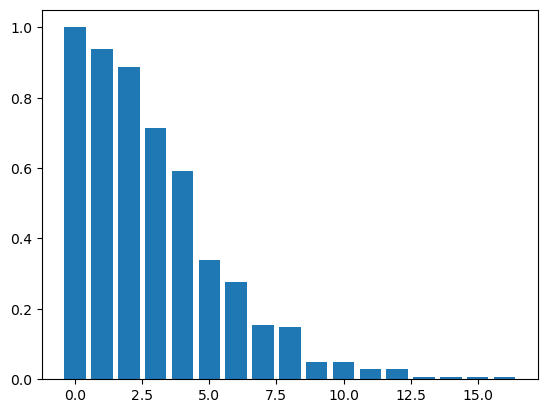

In [9]:
defense = defender_dist(4, cumulative = True)
plt.bar(x = np.arange(0, len(defense)), height = defense)

## Dice Roll Distributions
Select number of dice and role as attacker ('A') or defender ('D')

In [ ]:
n_dice = 5
role = 'D'

## Campaign Simulator